# 🍷 Wine Quality Dataset — Linear Regression (Step-by-Step, Beginner Friendly)
*Generated on 2025-09-12 03:29:55*

This notebook teaches **Linear Regression** with a Wine Quality dataset in **small, easy steps**.
Each step ends with a short **📝 TODO** so you can practice.

What you'll do:
1. Download + load the dataset (via **gdown**)
2. Inspect + clean data (simple)
3. Univariate plots (histograms)
4. Single-variable Linear Regression (fit + plot)
5. Multi-variable Linear Regression (fit + metrics)
6. Diagnostic plots (residuals)
7. Polynomial features + **GridSearchCV** to find the **best degree**
8. Brief coefficient interpretation
9. Linear Regression — Quick Assumptions Checklist
10. Assumption Checks — Code You Can Run

## 0) Setup

In [ ]:

#@title Install & import (safe to re-run)
import sys, subprocess

def pip_install(pkg):
    subprocess.run([sys.executable, "-m", "pip", "install", "-q", pkg], check=False)

pip_install("gdown>=5.1")
pip_install("pandas>=1.5")
pip_install("numpy>=1.23")
pip_install("matplotlib>=3.7")
pip_install("scikit-learn>=1.3")

import gdown, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## 1) Download & Load the Dataset

In [ ]:
OUTPUT_CSV = "WineQT.csv"

print("Found existing file:", OUTPUT_CSV)

df = pd.read_csv(OUTPUT_CSV)
print("✅ Loaded:", df.shape)
df.head()


Found existing file: WineQT.csv
✅ Loaded: (1143, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4



### 📝 TODO
- Skim the first few rows above. What looks like a good **target** (y) for prediction (e.g., `mpg`, `price`)?


## 2) Quick Inspect & Simple Cleaning

In [ ]:
print("Columns:", list(df.columns))
print("\nData types:\n", df.dtypes)
print("\nMissing values per column:\n", df.isna().sum())

# Simple cleaning: drop duplicates
before = df.shape[0]
df = df.drop_duplicates().reset_index(drop=True)
print("\nDropped duplicates:", before - df.shape[0])

# (Optional) strip/underscore column names
df.columns = [c.strip().replace(" ", "_") for c in df.columns]

# # Fill missing values with the mean of the column
# df.fillna(df.mean(), inplace=True)
# print("\nMissing values after filling:\n", df.isna().sum())

Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'Id']

Data types:
 fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

Missing values per column:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id               

In [ ]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

# # Create an IterativeImputer object
# # You can customize the estimator and other parameters if needed
# imputer = IterativeImputer(max_iter=10, random_state=0)

# # Apply the imputer to the DataFrame
# # IterativeImputer returns a numpy array, so convert it back to a pandas DataFrame
# df_filled = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# print("Missing values after IterativeImputer:\n", df_filled.isna().sum())

# # Update the original DataFrame with the imputed values
# df = df_filled


### 📝 TODO
- If you see obvious bad rows (e.g., impossible negative values), write one **extra line** to filter them out.


## 3) Choose Target and Features (Keep it Simple)

In [ ]:
# 👉 Set your target (change this if needed)
TARGET = "qt"  # <-- change if your dataset uses a different target

# If the target isn't present, try to auto-pick a numeric column
if TARGET not in df.columns:
    numeric_cols_all = df.select_dtypes(include=np.number).columns.tolist()
    if numeric_cols_all:
        TARGET = numeric_cols_all[0]
        print("Auto-selected TARGET =", TARGET)

# We'll work **only with numeric predictors** for simplicity.
numeric_cols = [c for c in df.select_dtypes(include=np.number).columns if c != TARGET]

# Quick sanity
print("Target:", TARGET)
print("Numeric features (first 6 shown):", numeric_cols[:6])

Auto-selected TARGET = fixed_acidity
Target: fixed_acidity
Numeric features (first 6 shown): ['volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide']



### 📝 TODO
- If you prefer different features, create a **manual list**, e.g.  
  `numeric_cols = ['horsepower','weight','displacement','acceleration']` (only if those exist).


## 4) Univariate Plots (Matplotlib)

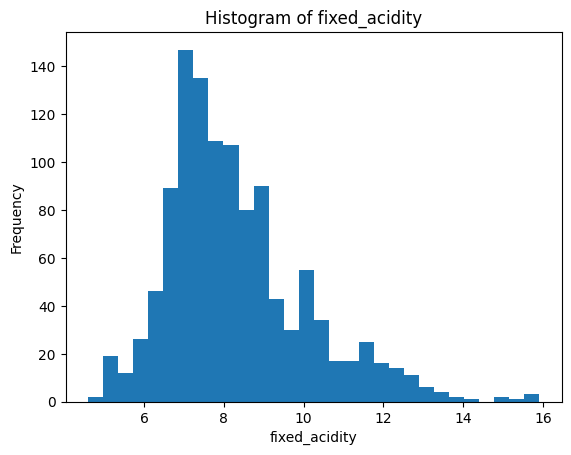

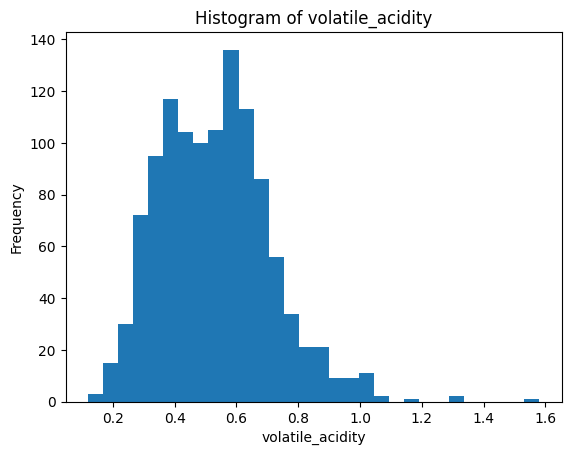

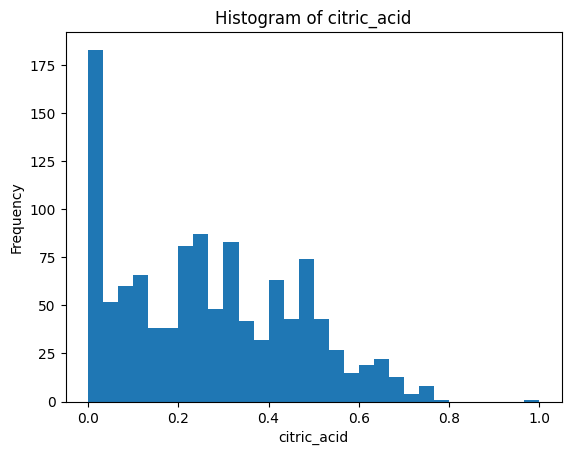

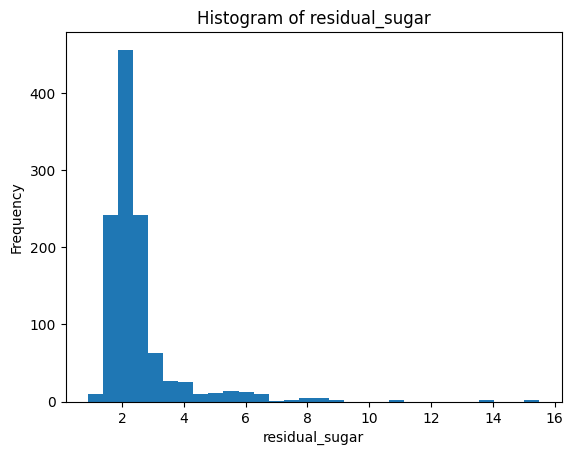

In [ ]:

# Plot target histogram
if TARGET in df.columns and pd.api.types.is_numeric_dtype(df[TARGET]):
    plt.figure()
    df[TARGET].plot(kind='hist', bins=30, title=f"Histogram of {TARGET}")
    plt.xlabel(TARGET); plt.ylabel("Frequency")
    plt.show()

# Plot up to 3 numeric features' histograms
for col in numeric_cols[:3]:
    plt.figure()
    df[col].plot(kind='hist', bins=30, title=f"Histogram of {col}")
    plt.xlabel(col); plt.ylabel("Frequency")
    plt.show()



### 📝 TODO
- Looking at the histograms, note any skewed variables or outliers.


## 5) Single-Variable Linear Regression

Feature: volatile_acidity
Coefficient (slope): -2.23285237494695
Intercept: 9.44377997831565
R^2 (test): 0.06564028893768192


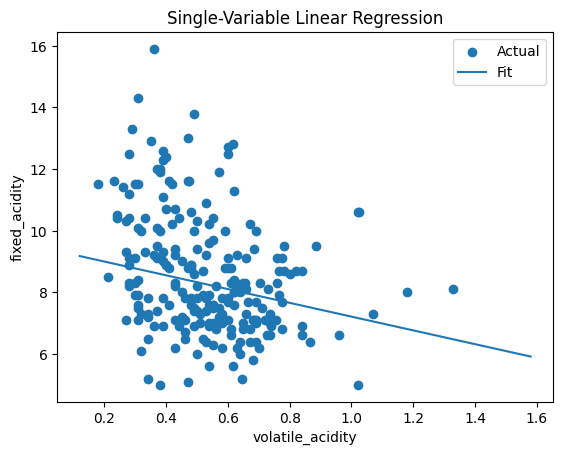

In [ ]:

# Pick one feature (auto-pick the first numeric feature)
if len(numeric_cols) == 0:
    raise ValueError("No numeric predictors found. Please adjust `numeric_cols`.")

FEATURE_X = numeric_cols[0]  # change to try others

# Drop rows with missing target/feature
data_1v = df[[FEATURE_X, TARGET]].dropna().copy()

X = data_1v[[FEATURE_X]].values
y = data_1v[TARGET].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions on test set
y_pred = lr.predict(X_test)

print("Feature:", FEATURE_X)
print("Coefficient (slope):", lr.coef_[0])
print("Intercept:", lr.intercept_)
print("R^2 (test):", r2_score(y_test, y_pred))

# Plot scatter + regression line (on test set)
plt.figure()
plt.scatter(X_test, y_test, label="Actual")
# create a line
x_line = np.linspace(X.min(), X.max(), 200).reshape(-1,1)
y_line = lr.predict(x_line)
plt.plot(x_line, y_line, label="Fit")
plt.xlabel(FEATURE_X); plt.ylabel(TARGET); plt.title("Single-Variable Linear Regression")
plt.legend()
plt.show()


### 📝 TODO
- Change `FEATURE_X` to a different column and re-run.
- Does the line slope match your intuition about the relationship?


## 6) Multi-Variable Linear Regression (Simple)

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Keep only numeric predictors + target; drop NA
# Remove 'Id' column as it's likely an identifier and not a feature
numeric_cols_mv = [c for c in df.select_dtypes(include=np.number).columns.tolist() if c != TARGET_COL and c != 'Id']
data_mv = df[numeric_cols_mv + [TARGET_COL]].dropna().copy()

X = data_mv[numeric_cols_mv].values
y = data_mv[TARGET_COL].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin = LinearRegression()
lin.fit(X_train, y_train)

y_pred = lin.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE manually
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.3f}")
print(f"MSE:  {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R^2:  {r2:.3f}")

# Use all numeric features for multi-variable regularization
X_all = df[numeric_cols_mv].values # Use numeric_cols_mv here as well
y_all = df[TARGET_COL].values # Use TARGET_COL here as well


# Ridge Regression Pipeline and GridSearchCV (Multi-variable)
ridge_pipe_mv = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(include_bias=False)),
    ("ridge", Ridge())
])

ridge_param_grid_mv = {
    "poly__degree": [1, 2], # Limit degree to avoid excessive complexity
    "ridge__alpha": [0.01, 0.1, 1.0, 10.0, 100.0]
}

ridge_grid_mv = GridSearchCV(ridge_pipe_mv, ridge_param_grid_mv, cv=5, scoring="r2", n_jobs=-1)
ridge_grid_mv.fit(X_all, y_all)

# Lasso Regression Pipeline and GridSearchCV (Multi-variable)
lasso_pipe_mv = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(include_bias=False)),
    ("lasso", Lasso(max_iter=10000)) # Increase max_iter for convergence
])

lasso_param_grid_mv = {
    "poly__degree": [1, 2], # Limit degree to avoid excessive complexity
    "lasso__alpha": [0.001, 0.01, 0.1, 1.0, 10.0]
}

lasso_grid_mv = GridSearchCV(lasso_pipe_mv, lasso_param_grid_mv, cv=5, scoring="r2", n_jobs=-1)
lasso_grid_mv.fit(X_all, y_all)


# Add the best CV R^2 scores from Ridge and Lasso
print("\nMulti-variable Ridge Best CV R^2:", ridge_grid_mv.best_score_)
print("Multi-variable Lasso Best CV R^2:", lasso_grid_mv.best_score_)

MAE:  0.477
MSE:  0.380
RMSE: 0.616
R^2:  0.317

Multi-variable Ridge Best CV R^2: 0.31360772010169763
Multi-variable Lasso Best CV R^2: 0.3147697052937569


In [ ]:
# Calculate R^2 on the training set for the multi-variable linear regression model
y_train_pred = lin.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)

# Get the test R^2 from the previous output
test_r2 = r2_score(y_test, y_pred)

# Calculate the gap
r2_gap = train_r2 - test_r2

print(f"R² (Test): {test_r2:.3f}")
print(f"Train R²: {train_r2:.3f}")
print(f"Gap (Train–Test): {r2_gap:.3f}")

R² (Test): 0.317
Train R²: 0.382
Gap (Train–Test): 0.065



### 📝 TODO
- Remove one weak feature from `numeric_cols` and see how metrics change.
- Add a different feature and compare.


## 7) Diagnostic Plots (Residuals)

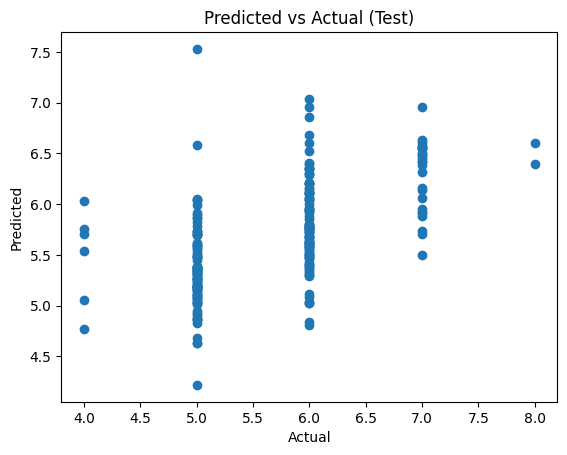

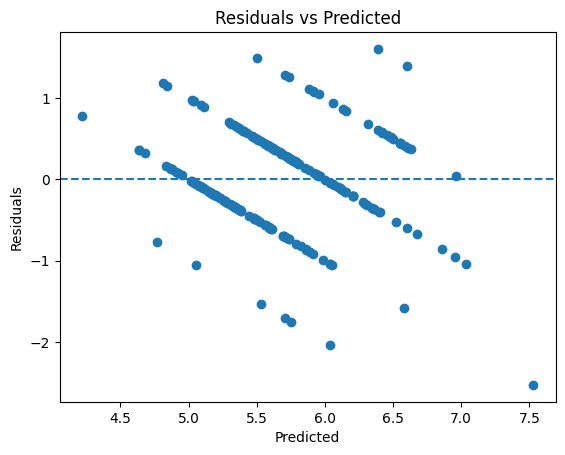

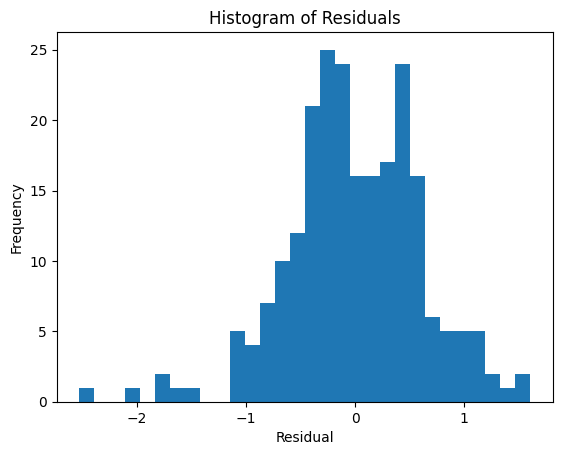

In [ ]:

# Reuse y_test and y_pred from multi-variable model
residuals = y_test - y_pred

# Predicted vs Actual
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual"); plt.ylabel("Predicted")
plt.title("Predicted vs Actual (Test)")
plt.show()

# Residuals vs Predicted
plt.figure()
plt.scatter(y_pred, residuals)
plt.axhline(0, linestyle='--')
plt.xlabel("Predicted"); plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

# Histogram of residuals
plt.figure()
pd.Series(residuals).plot(kind='hist', bins=30, title="Histogram of Residuals")
plt.xlabel("Residual"); plt.ylabel("Frequency")
plt.show()



### 📝 TODO
- Do residuals look roughly centered around 0 and evenly spread?
- If not, which assumption might be violated?


## 8) Polynomial Features + Grid Search for Best Degree


Even though it's called "polynomial regression", it's still **linear regression** applied to **polynomially-expanded features**.
We'll try degrees **1 to 5** on a **single predictor** and pick the degree with the best cross-validated **R²**.


In [ ]:
# Choose a single predictor again (same FEATURE_X as before by default)
# FEATURE_X = FEATURE_X  # keep same, or set to something else like 'horsepower'

# Use all numeric predictors + target; drop NA
TARGET_COL = "quality" # Setting the target column explicitly

# Remove 'Id' column as it's likely an identifier and not a feature
numeric_cols_all = [c for c in df.select_dtypes(include=np.number).columns.tolist() if c != TARGET_COL and c != 'Id']


poly_data = df[numeric_cols_all + [TARGET_COL]].dropna().copy()
X = poly_data[numeric_cols_all].values
y = poly_data[TARGET_COL].values

# Split data for evaluation after finding best hyperparameters
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Ridge Regression Pipeline and GridSearchCV
ridge_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(include_bias=False)),
    ("ridge", Ridge())
])

ridge_param_grid = {
    "poly__degree": [1, 2, 3],
    "ridge__alpha": [0.01, 0.1, 1.0, 10.0, 100.0]
}

ridge_grid = GridSearchCV(ridge_pipe, ridge_param_grid, cv=5, scoring="r2", n_jobs=-1)
ridge_grid.fit(X_train, y_train) # Fit on training data for CV

print("Ridge Best Parameters:", ridge_grid.best_params_)


# Lasso Regression Pipeline and GridSearchCV
lasso_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(include_bias=False)),
    ("lasso", Lasso(max_iter=10000))
])

lasso_param_grid = {
    "poly__degree": [1, 2, 3],
    "lasso__alpha": [0.001, 0.01, 0.1, 1.0, 10.0]
}

lasso_grid = GridSearchCV(lasso_pipe, lasso_param_grid, cv=5, scoring="r2", n_jobs=-1)
lasso_grid.fit(X_train, y_train) # Fit on training data for CV

print("\nLasso Best Parameters:", lasso_grid.best_params_)

# Print the best CV R^2 score
best_cv_r2 = max(ridge_grid.best_score_, lasso_grid.best_score_)
print("\nOverall Best CV R^2:", best_cv_r2)

# Evaluate the best Ridge model on the test set
best_ridge_model = ridge_grid.best_estimator_
y_pred_ridge = best_ridge_model.predict(X_test)
test_r2_ridge = r2_score(y_test, y_pred_ridge)
print("\nRidge Test R^2:", test_r2_ridge)

# Evaluate the best Lasso model on the test set
best_lasso_model = lasso_grid.best_estimator_
y_pred_lasso = best_lasso_model.predict(X_test)
test_r2_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso Test R^2:", test_r2_lasso)


# Plot the best curve from the model with the highest test R^2 (either Ridge or Lasso)
best_model = best_ridge_model if test_r2_ridge > test_r2_lasso else best_lasso_model
best_test_r2 = max(test_r2_ridge, test_r2_lasso)


# This plot will be difficult to interpret with multiple features,
# so we'll skip plotting a single curve on a scatter plot of all features.
# We can instead plot the residuals vs predicted values, as done in section 7.

# print("\nPlotting residuals for the best model:")
# residuals = y_test - (best_model.predict(X_test))

# plt.figure()
# plt.scatter(best_model.predict(X_test), residuals, s=14)
# plt.axhline(0, linestyle="--")
# plt.xlabel("Predicted")
# plt.ylabel("Residuals")
# plt.title(f"Residuals vs Predicted (Best Model, Test Set, R^2: {best_test_r2:.3f})")
# plt.show()

Ridge Best Parameters: {'poly__degree': 1, 'ridge__alpha': 10.0}

Lasso Best Parameters: {'lasso__alpha': 0.01, 'poly__degree': 1}

Overall Best CV R^2: 0.35531878513255777

Ridge Test R^2: 0.31964077596811236
Lasso Test R^2: 0.3352705125166172



### 📝 TODO
- Change the degree range (e.g., 1–8) and re-run. Does performance keep improving?
- Try a different `FEATURE_X`.


## 9) Interpreting Coefficients (Multi-Variable Model)

In [ ]:
# Show top coefficients by magnitude (multi-variable linear model)
coef = lin.coef_
coef_df = pd.DataFrame({"feature": numeric_cols_mv, "coefficient": coef}) # Use numeric_cols_mv here
coef_df["abs_coef"] = coef_df["coefficient"].abs()
coef_df.sort_values("abs_coef", ascending=False, inplace=True)
coef_df.drop(columns=["abs_coef"], inplace=True)
coef_df.head(10)

,feature,coefficient
7,density,-30.653256
4,chlorides,-1.806530
1,volatile_acidity,-1.336257
9,sulphates,0.973040
2,citric_acid,-0.339101
10,alcohol,0.266586
8,pH,-0.249236
0,fixed_acidity,0.051343
3,residual_sugar,0.004121
6,total_sulfur_dioxide,-0.002283



### 📝 TODO
- Which features have the largest (absolute) coefficients?
- Do the signs (+/-) match your intuition?



## 10) Linear Regression — Quick Assumptions Checklist
- **Linearity**: Relationship between predictors and target is roughly linear.
- **Independence**: Errors are independent.
- **Homoscedasticity**: Residuals have constant variance.
- **Normality (for inference)**: Residuals are roughly normal.
- **No perfect multicollinearity**: Avoid duplicate/linearly dependent features.



## 11) Assumption Checks — Code You Can Run
We'll check the classic linear regression assumptions using simple, readable code:
- **Linearity & Homoscedasticity:** residuals vs predicted plot
- **Normality of residuals:** Q–Q plot and Shapiro–Wilk test
- **Independence of errors:** Durbin–Watson statistic
- **Multicollinearity:** Variance Inflation Factor (VIF)


In [ ]:

#@title Install test libs (statsmodels) if needed
import sys, subprocess
def pip_install(pkg):
    subprocess.run([sys.executable, "-m", "pip", "install", "-q", pkg], check=False)

try:
    import statsmodels
except:
    pip_install("statsmodels>=0.14")
    import statsmodels

from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# NOTE: This cell assumes you've already run the multi-variable model section
# so that y_test, y_pred, X_train, X_test, numeric_cols, TARGET are defined.
# If not, re-run sections 6 and 7.


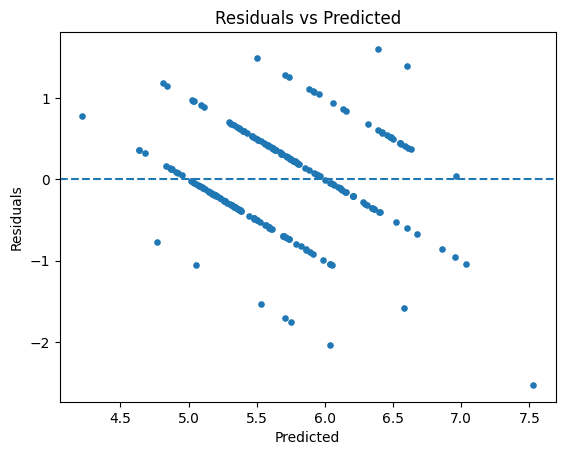

🧐 Look for: no obvious curve/pattern; spread roughly constant across x-axis.


In [ ]:

# 11.1 Linearity & Homoscedasticity (visual)
# Residuals vs Predicted should look like a random cloud around 0 (no pattern / fanning)

residuals = y_test - y_pred

plt.figure()
plt.scatter(y_pred, residuals, s=14)
plt.axhline(0, linestyle="--")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

print("🧐 Look for: no obvious curve/pattern; spread roughly constant across x-axis.")


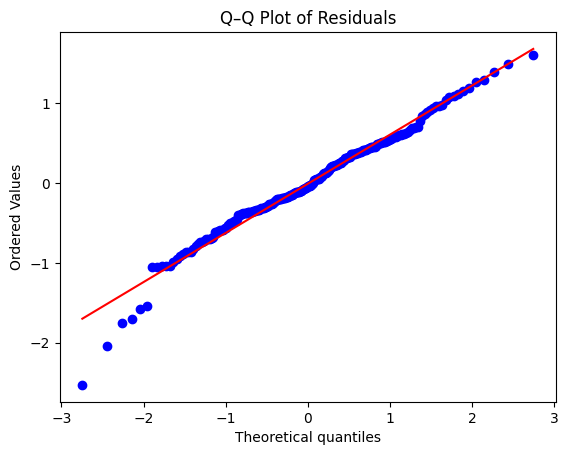

Shapiro–Wilk: statistic=0.980, p-value=0.00239
Rule of thumb: p-value > 0.05 suggests residuals are close to normal (for inference).


In [ ]:

# 11.2 Normality of residuals: Q–Q plot + Shapiro–Wilk test
plt.figure()
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q–Q Plot of Residuals")
plt.show()

sh_stat, sh_p = stats.shapiro(residuals)
print(f"Shapiro–Wilk: statistic={sh_stat:.3f}, p-value={sh_p:.3g}")
print("Rule of thumb: p-value > 0.05 suggests residuals are close to normal (for inference).")


In [ ]:

# 11.3 Independence of errors: Durbin–Watson (≈2 is good; <1 or >3 indicates strong autocorrelation)
dw = durbin_watson(residuals)
print(f"Durbin–Watson statistic = {dw:.3f}")
print("Guideline: ~2 means uncorrelated; much below 2 ⇒ positive autocorrelation; much above 2 ⇒ negative autocorrelation.")


Durbin–Watson statistic = 2.137
Guideline: ~2 means uncorrelated; much below 2 ⇒ positive autocorrelation; much above 2 ⇒ negative autocorrelation.


In [ ]:
# 11.4 Homoscedasticity formal test: Breusch–Pagan
# Use original predictors (X_test). Add constant for the test design matrix.

X_bp = sm.add_constant(pd.DataFrame(X_test, columns=numeric_cols_mv)) # Use numeric_cols_mv here
bp_stat, bp_p, _, _ = het_breuschpagan(residuals, X_bp)
print(f"Breusch–Pagan: stat={bp_stat:.3f}, p-value={bp_p:.3g}")
print("Rule of thumb: p-value > 0.05 ⇒ no strong evidence of heteroscedasticity.")

Breusch–Pagan: stat=42.961, p-value=1.1e-05
Rule of thumb: p-value > 0.05 ⇒ no strong evidence of heteroscedasticity.


In [ ]:
# 11.5 Multicollinearity: VIF (on training predictors)
X_vif = pd.DataFrame(X_train, columns=numeric_cols_mv).dropna() # Use numeric_cols_mv here
X_vif_const = sm.add_constant(X_vif, has_constant='add')

vif_vals = []
# Iterate through the original column names to get the correct index
for i, col in enumerate(numeric_cols_mv): # Iterate through numeric_cols_mv
    # Find the index of the column in the array with the constant
    col_index_with_constant = X_vif_const.columns.get_loc(col)
    vif_vals.append({"feature": col, "VIF": variance_inflation_factor(X_vif_const.values, col_index_with_constant)})

vif_df = pd.DataFrame(vif_vals).sort_values("VIF", ascending=False)
vif_df

,feature,VIF
0,fixed_acidity,7.815892
7,density,6.959241
8,pH,3.338158
10,alcohol,3.313032
2,citric_acid,3.225844
6,total_sulfur_dioxide,2.108312
5,free_sulfur_dioxide,1.925935
1,volatile_acidity,1.817249
3,residual_sugar,1.690831
4,chlorides,1.590685



### 📝 TODO
- If **Breusch–Pagan p < 0.05**, try transforming a skewed feature (e.g., `np.log1p(x)`) and re-fit.  
- If **Shapiro p < 0.05**, consider outliers or feature transforms.  
- If **VIF > 10** for a feature, try removing it or combining highly correlated features.  
- If **Durbin–Watson** is far from 2 (time-indexed data), try adding lag features or using time-series models.
